In [1]:
def suma(a, b, c):
    return a+b+c

def resta(a,b, que=False):
    return a-b    

def gen_exp(funcion, **kwargs):
    return funcion(**kwargs)    

In [2]:
gen_exp(suma, a=1, b=2, c=3)

6

In [3]:
diccionario = {"a" : 1, "b" : 2}

In [4]:
resta(que=False, **diccionario)

-1

In [5]:
settings = [
    {"n_shots": 500, 
    "n_repeat": 10, 
    "no_particles": 150, 
    "SMC_fun": "default"},
    {
        "n_shots": 500,
        "n_repeat": 10,
        "no_particles": 150,
        "SMC_fun": "slower",
        "update_rate": 0.4,
    },
    {"n_shots": 500, 
    "n_repeat": 10, 
    "no_particles": 500, 
    "SMC_fun": "default"},
    {
        "n_shots": 500,
        "n_repeat": 10,
        "no_particles": 500,
        "SMC_fun": "slower",
        "update_rate": 0.4,
    },
]


In [6]:
import json

In [8]:
# json.dumps(settings, "lista.json")

In [9]:
# with open("mydata.json", "w") as final:
#     json.dump(settings, final)

In [10]:
# with open("mydata.json") as final:
#     a = json.load(final)


In [11]:
# a[0]

In [16]:
import qutip as qu
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [17]:
import solve_lindblad

In [18]:
a = qu.rand_dm(2)
print(a)
print(a.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.72394453+0.j         0.0238058 +0.35082119j]
 [0.0238058 -0.35082119j 0.27605547+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.72394453+0.j         0.0238058 +0.35082119j]
 [0.0238058 -0.35082119j 0.27605547+0.j        ]]


In [38]:
def eL_L_rho(rho0, H0, operators, t, no_qubits=1, dagger=False):
    liouvillian = qu.liouvillian(H0, c_ops=operators)
    rho_sup = qu.to_super(rho0)
    rho_evol = scipy.linalg.expm(liouvillian.full()*t)@liouvillian.full()@rho_sup.full()
    pre_dm_evol = rho_evol[:, 0].reshape(-1, 2**no_qubits)
    dm_evol = qu.Qobj(pre_dm_evol)
    if dagger:
        return dm_evol, dm_evol.dag()
    else:
        return dm_evol

In [39]:
H0 = 0.4*qu.sigmax()
psi0 = qu.basis(2, 0)
rho0 = qu.ket2dm(psi0)
J = 0.3

dm_evol, dm_evol_dagger = eL_L_rho(rho0, H0, [J * qu.sigmax()], 0, dagger=True )

In [40]:
rho0.full()

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [41]:
dm_evol.full()

array([[-0.09+0.j ,  0.  -0.4j],
       [ 0.  +0.4j,  0.09+0.j ]])

In [42]:
print(dm_evol_dagger)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.09+0.j   0.  -0.4j]
 [ 0.  +0.4j  0.09+0.j ]]


In [ ]:
# final_t = par_config[0]

#         omega = par_config[1][0]
#         J = par_config[1][1]
#         H0 = 2 * np.pi * omega * qu.sigmax()
#         psi0 = qu.basis(2, 0)
#         rho0 = qu.ket2dm(psi0)
#         # times = np.linspace(0.0, final_t, 3000)
#         # Z0 = qu.ket2dm(qu.basis(2, 0))
#         final_dm = solve_lindblad.evolve_dm(rho0, H0, [J * qu.sigmax()], final_t, 1)
#         # result = qu.mesolve(H0, psi0, times, [J * qu.sigmax()], [Z0])

#         _, _, prob = qu.measurement.measurement_statistics(final_dm, qu.sigmaz())
#         # return np.array(result.expect[0][-1])
#         return np.array(prob[1])

In [43]:
a =qu.basis(2, 0)
print(a.dag()*a)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]


In [44]:
m = [qu.basis(2,0), qu.basis(2,1)]
m = qu.basis(2,0)

In [156]:
[ x/y for x,y in  zip([1, 2], [1, 2])]

[1.0, 1.0]

In [63]:
def expected_fisher_inf_matrix(t, rho0, H0, operators, projectors):
    rho_t = solve_lindblad.evolve_dm(rho0, H0, operators, t)
    rho_prime = eL_L_rho(rho0, H0, operators, t)
    _, _, tr_rho_prime = qu.measurement.measurement_statistics(rho_prime, projectors)
    _, _, tr_rho = qu.measurement.measurement_statistics(rho_t, projectors)
    return np.sum([(tr_rho_prime_i/tr_rho_i)**2*tr_rho_i for tr_rho_i, tr_rho_prime_i in zip(tr_rho, tr_rho_prime)])


In [58]:
t= 0.3

rho_t = solve_lindblad.evolve_dm(rho0, H0, [J * qu.sigmax()], t)
rho_prime = eL_L_rho(rho0, H0, [J * qu.sigmax()], t)


In [83]:
from functools import partial
?partial

fisher_t = partial(expected_fisher_inf_matrix, rho0 = rho0, H0 = H0, operators = [J*qu.sigmax()], projectors = qu.sigmaz())

fisher_t_J = partial(expected_fisher_inf_matrix, rho0 = rho0, H0 = H0,  projectors = qu.sigmaz())

Init signature: partial(self, /, *args, **kwargs)
Docstring:     
partial(func, *args, **keywords) - new function with partial application
of the given arguments and keywords.
File:           ~/miniconda3/envs/qinfer/lib/python3.10/functools.py
Type:           type
Subclasses:     partial


In [95]:
plotea_t_J = lambda a,b : fisher_t_J(t= a, operators=[b*qu.sigmax()])

In [138]:
plotea_t_J(0.3, 0.3)

0.7811604918823051

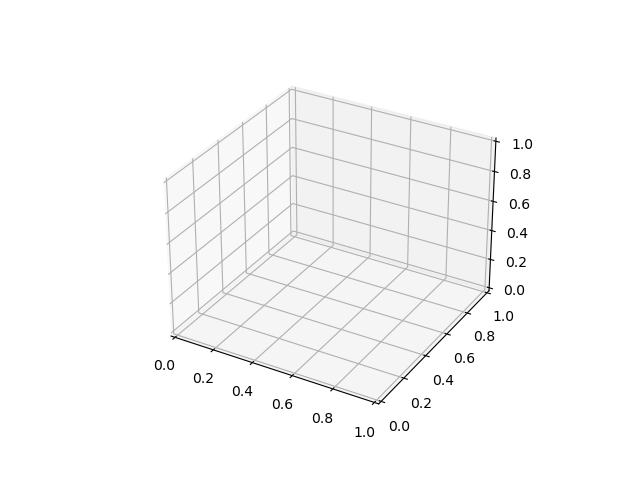

In [152]:
fig = plt.figure()
ax = plt.axes(projection='3d')


times = np.linspace(0.0001, 0.5, 50)
J = np.linspace(0, 0.5, 50)
X, Y = np.meshgrid(times, J, sparse=False)

plot_prime = np.vectorize(plotea_t_J)
Z = plot_prime(X, Y)
# X

Text(0.5, 0, 'Exp. Fisher Inf. Matrix')

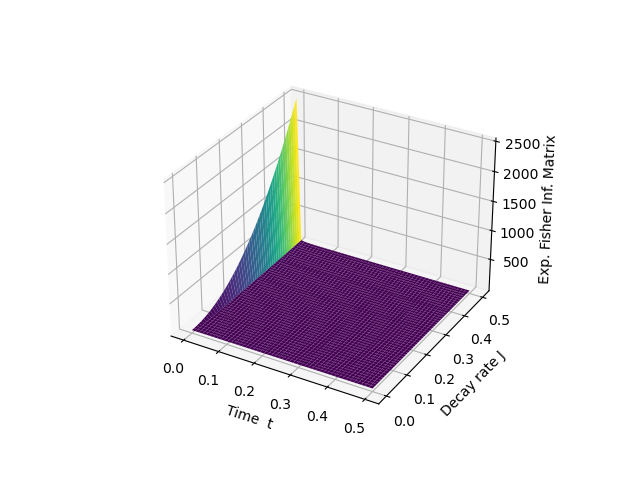

In [153]:
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')


ax.set_xlabel('Time  t')
ax.set_ylabel('Decay rate J')
ax.set_zlabel('Exp. Fisher Inf. Matrix')



In [148]:
t_1d = np.linspace(0.01, 1, 100 )
inf_1d = np.vectorize(fisher_t)(t_1d)


In [149]:
plt.plot(t_1d, inf_1d)

In [82]:
fisher_t(t)

0.7811604918823051

In [88]:
qu.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [100]:
times = np.linspace(0, 1, 100)
J = np.linspace(0, 0.5, 5)
# J = np.array([ji*qu.sigmax() for ji in np.linspace(0, 0.5, 5)])

In [ ]:
a = np.linspace()

In [91]:
np.meshgrid(times, J)

[array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
         0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
         0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
         0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
         0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
         0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
         0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
         0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
         0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
         0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
         0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
         0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
         0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
         0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
         0.70707071, 0.71717172, 0

In [76]:
def fisher_t(t, **kwargs):
    return expected_fisher_inf_matrix(t, **kwargs)

In [77]:
fisher_t(t, rho0 = rho0, H0 = H0, operators = [J*qu.sigmax()], projectors = qu.sigmaz())

0.7811604918823051

In [64]:
expected_fisher_inf_matrix(t, rho0, H0, [J*qu.sigmax()], qu.sigmaz())

0.7811604918823051

In [59]:
_, _, tr_rho_prime = qu.measurement.measurement_statistics(rho_prime, qu.sigmaz())
_, _, tr_rho = qu.measurement.measurement_statistics(rho_t, qu.sigmaz())


In [60]:
np.sum([(tr_rho_prime_i/tr_rho_i)**2*tr_rho_i for tr_rho_i, tr_rho_prime_i in zip(tr_rho, tr_rho_prime)])

0.7811604918823051

In [52]:
[a+ b for a,b in zip(range(0, 10), range(0, 10))]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [37]:
dm_evol.to

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.09+0.j   0.  -0.4j]
 [ 0.  +0.4j  0.09+0.j ]]